In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso

In [2]:
# Importing the Train dataset
sales_train = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 1/Machine Learning/Assignment 1/Train.csv')
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Finding the correlation
sales_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


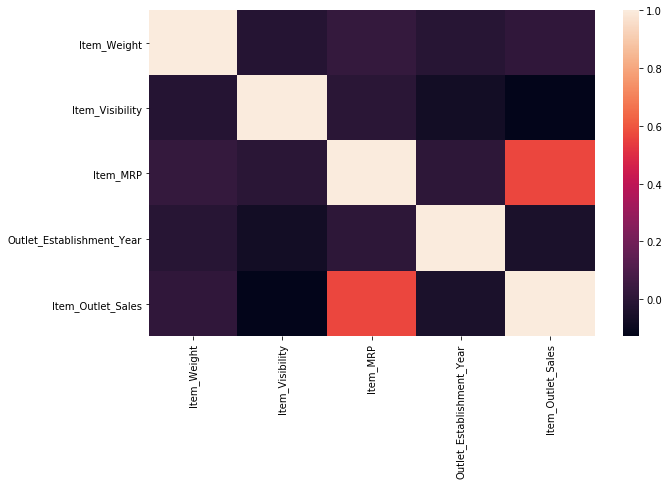

In [4]:
# Plotting the correlation using Heatmap
plt.figure(figsize=(10,6))
sb.heatmap(sales_train.corr())

In [5]:
# Checking the number of rows and columns of the dataset
sales_train.shape

(8523, 12)

In [6]:
# Checking the names of the columns of the dataset
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Finding the sum of null values in each column
sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking the stats of the numerical columns
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Checking the unique values in each column
print(sales_train['Item_Fat_Content'].unique())
print(sales_train['Item_Type'].unique())
print(sales_train['Outlet_Identifier'].unique())
print(sales_train['Outlet_Size'].unique())
print(sales_train['Outlet_Location_Type'].unique())
print(sales_train['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
# Checking which value is present most number of times in the particular column
sales_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [11]:
# Converting all the values of the column to lower case and replacing it with one value
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].str.lower().replace('lf','low fat').replace('reg','regular')

In [12]:
# Creating another dataframe with the same columns
sales_train_imputed = sales_train
sales_train_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# Filling all the null values present in the column with the mean of the column
Item_Weight_Mean = sales_train_imputed['Item_Weight'].mean()
sales_train_imputed['Item_Weight'] = sales_train_imputed['Item_Weight'].fillna(Item_Weight_Mean)
sales_train_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
# Filling all the null values present in the column with the value 'Medium' 
sales_train_imputed['Outlet_Size'] = sales_train_imputed['Outlet_Size'].fillna('Medium')
sales_train_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
le = LabelEncoder() # Creating object
sales_train_imputed['Item_Fat_Content'] = le.fit_transform(sales_train_imputed['Item_Fat_Content'])
sales_train_imputed['Item_Type'] = le.fit_transform(sales_train_imputed['Item_Type'])
sales_train_imputed['Outlet_Size'] = le.fit_transform(sales_train_imputed['Outlet_Size'])
sales_train_imputed['Outlet_Location_Type'] = le.fit_transform(sales_train_imputed['Outlet_Location_Type'])
sales_train_imputed['Outlet_Type'] = le.fit_transform(sales_train_imputed['Outlet_Type'])
sales_train_imputed.head()

# Label Encoder helps in specifying a unique numerical value for each unique categorical value present in the column

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [16]:
sales_train_imputed = pd.get_dummies(sales_train_imputed, columns = ['Outlet_Identifier'])
sales_train_imputed.head()

# .get_dummies helps in converting categorical data to numerical data creating separate columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,4,249.8092,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,14,48.2692,2009,1,2,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,10,141.6180,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,6,182.0950,1998,1,2,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,9,53.8614,1987,0,2,1,...,0,1,0,0,0,0,0,0,0,0


In [17]:
# Dropping the columns which won't help in creating the model
sales_train_imputed.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
sales_train_imputed.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,0,1,0,0,0,0,0,0,0,0


In [18]:
# Checking the number of rows and columns in the new dataframe
sales_train_imputed.shape

(8523, 19)

### Linear Regression

In [19]:
X = sales_train_imputed.drop(['Item_Outlet_Sales'], axis=1)
Y = sales_train_imputed['Item_Outlet_Sales']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=3)

In [21]:
LinReg=LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('b=', LinReg.coef_)
print('a=', LinReg.intercept_)

b= [ 1.41942002e-03  5.71380269e+01 -4.26270882e+02  1.05769760e+00
  1.53826159e+01 -2.18961037e+02 -2.55089182e+02  8.96455004e+02
 -4.98046980e+02  3.10162031e+02  3.46381370e+02 -6.77256321e+02
 -7.56070308e+02  1.59797018e+02  6.29020048e+02  1.80197903e+02
  2.18251254e+02  8.75639843e+01]
a= -584.505927404301


In [23]:
y_pred=LinReg.predict(x_test)
print(y_pred)

[2836.54104208 2048.07063597  526.28960697 ... 1228.29680328 2150.76463068
 2402.50422755]


In [24]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 1083.776672256336


In [25]:
r2=r2_score(y_test,y_pred)
print('Regressor score is:',r2)

Regressor score is: 0.6062848069671247


Text(0.5, 1.0, 'Linear Regression - Residual Plot')

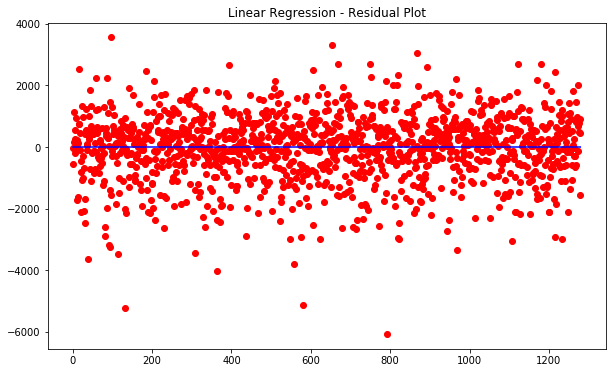

In [26]:
z=[i for i in range(1,len(y_pred)+1)]
plt.figure(figsize=(10,6))
z_plot=plt.scatter(z,(y_pred-y_test),color='red')
plt.plot(z,y_pred==0,color='blue')
plt.title('Linear Regression - Residual Plot')

In [27]:
predictors=x_train.columns
predictors

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'],
      dtype='object')

In [28]:
coef=pd.Series(LinReg.coef_,predictors).sort_values()
coef

Outlet_Identifier_OUT019   -756.070308
Outlet_Identifier_OUT018   -677.256321
Outlet_Identifier_OUT010   -498.046980
Item_Visibility            -426.270882
Outlet_Location_Type       -255.089182
Outlet_Size                -218.961037
Item_Weight                   0.001419
Item_Type                     1.057698
Item_MRP                     15.382616
Item_Fat_Content             57.138027
Outlet_Identifier_OUT049     87.563984
Outlet_Identifier_OUT027    159.797018
Outlet_Identifier_OUT045    180.197903
Outlet_Identifier_OUT046    218.251254
Outlet_Identifier_OUT013    310.162031
Outlet_Identifier_OUT017    346.381370
Outlet_Identifier_OUT035    629.020048
Outlet_Type                 896.455004
dtype: float64

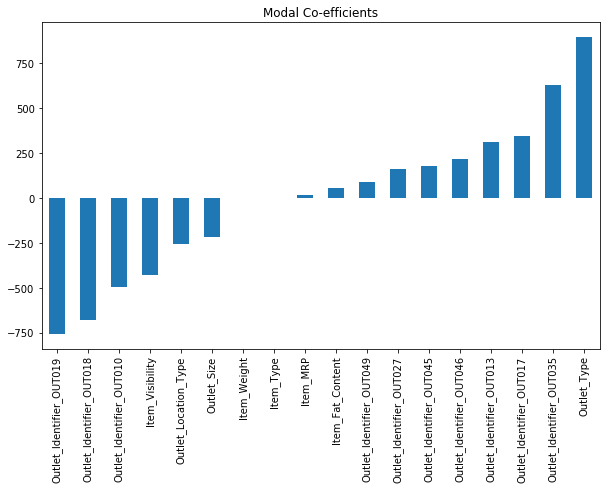

In [29]:
plt.figure(figsize=(10,6))
coef.plot(kind='bar',title='Modal Co-efficients')

### Lasso Regression

In [30]:
alpha_values=[0.01,0.05,0.1,0.5]
for i in alpha_values:
    LassoReg=Lasso(alpha=i,normalize=True)
    LassoReg.fit(x_train,y_train)
    pred1=LassoReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred1))
    r2=r2_score(y_test,pred1)

    print('RMSE for',[i],'=',rmse, 'R2 for',[i],'=',r2)

RMSE for [0.01] = 1083.7795438035403 R2 for [0.01] = 0.6062827206087658
RMSE for [0.05] = 1083.8734512869407 R2 for [0.05] = 0.6062144879116069
RMSE for [0.1] = 1084.2454886709281 R2 for [0.1] = 0.6059441093447844
RMSE for [0.5] = 1091.2315021680918 R2 for [0.5] = 0.6008497861848653


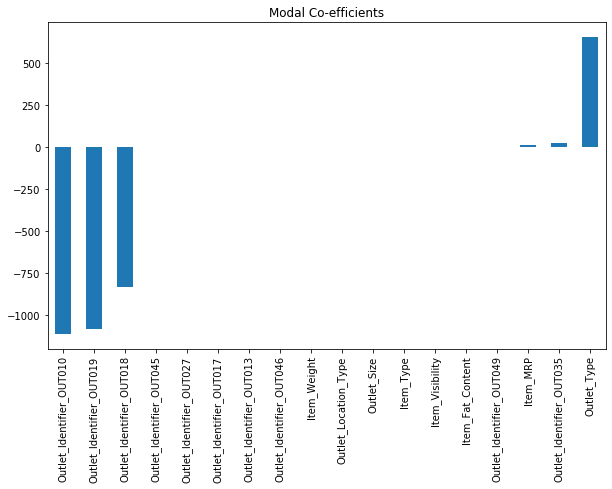

In [31]:
plt.figure(figsize = (10,6))
predictors = x_train.columns
coef = pd.Series(LassoReg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Modal Co-efficients')

Text(0.5, 1.0, 'Lasso Regression - Residual Plot')

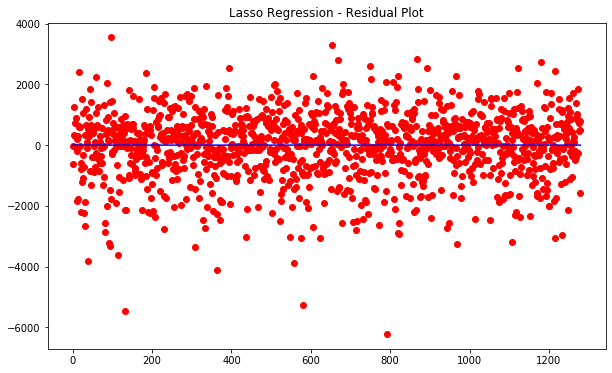

In [32]:
z2=[i for i in range(1,len(pred1)+1)]
plt.figure(figsize=(10,6))
z2_plot=plt.scatter(z2,(pred1-y_test),color='red')
plt.plot(z2,pred1==0,color='blue')
plt.title('Lasso Regression - Residual Plot')

### Ridge Regression

In [33]:
alpha_values=[0.01,0.05,0.1,0.5]
for i in alpha_values:
    RidgeReg=Ridge(alpha=i,normalize=True)
    RidgeReg.fit(x_train,y_train)
    pred2=RidgeReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred2))
    r2=r2_score(y_test,pred2)

    print('RMSE for',[i],'=',rmse, 'R2 for',[i],'=',r2)

RMSE for [0.01] = 1084.5609500012015 R2 for [0.01] = 0.6057147747878366
RMSE for [0.05] = 1088.5422677848505 R2 for [0.05] = 0.6028146961444942
RMSE for [0.1] = 1095.0543913830631 R2 for [0.1] = 0.5980482177108355
RMSE for [0.5] = 1169.612828254632 R2 for [0.5] = 0.5414498684646083


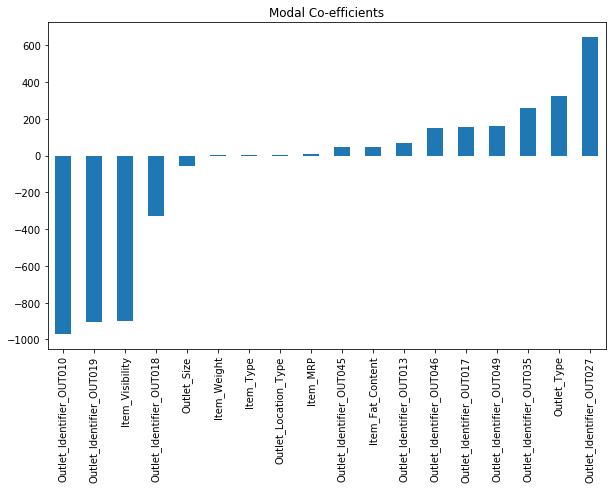

In [34]:
plt.figure(figsize = (10,6))
predictors = x_train.columns
coef = pd.Series(RidgeReg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Modal Co-efficients')

Text(0.5, 1.0, 'Ridge Regression - Residual Plot')

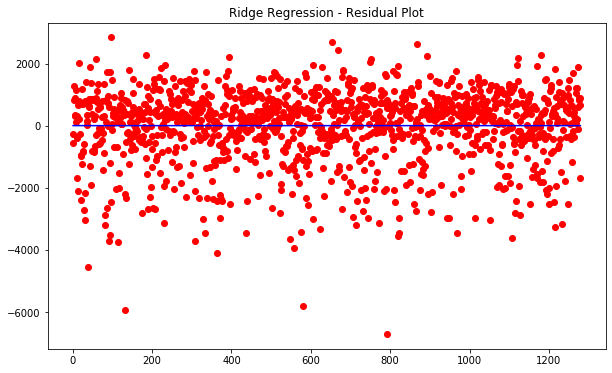

In [35]:
z3=[i for i in range(1,len(pred2)+1)]
plt.figure(figsize=(10,6))
z3_plot=plt.scatter(z,(pred2-y_test),color='red')
plt.plot(z3,pred2==0,color='blue')
plt.title('Ridge Regression - Residual Plot')

### Test.csv File

In [36]:
# Importing the Train dataset
sales_test = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 1/Machine Learning/Assignment 1/Test.csv')
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [37]:
# Finding the correlation
sales_test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


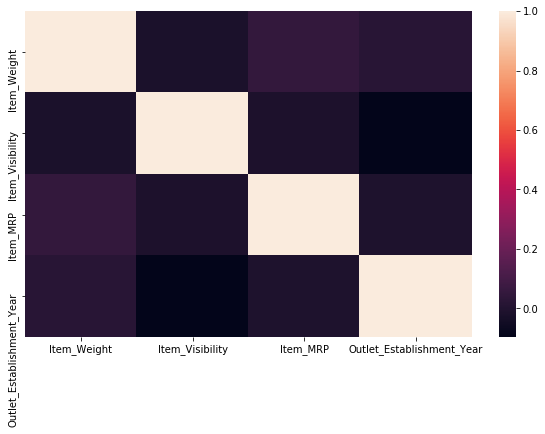

In [38]:
# Plotting the correlation using Heatmap
plt.figure(figsize=(10,6))
sb.heatmap(sales_test.corr())

In [39]:
# Checking the number of rows and columns in the dataset
sales_test.shape

(5681, 11)

In [40]:
# Checking the names of the columns of the dataset
sales_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [41]:
# Checking the stats of the numerical columns of the dataset
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [42]:
# Finding the sum of the null values present in each column of the dataset
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
# Checking the unique values in each column
print(sales_test['Item_Fat_Content'].unique())
print(sales_test['Item_Type'].unique())
print(sales_test['Outlet_Identifier'].unique())
print(sales_test['Outlet_Size'].unique())
print(sales_test['Outlet_Location_Type'].unique())
print(sales_test['Outlet_Type'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
['Medium' nan 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [44]:
# Checking which value is present most number of times in the particular column
sales_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [45]:
# Converting all the values of the column to lower case and replacing it with one value
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].str.lower().replace('lf','low fat').replace('reg','regular')

In [46]:
# Creating another dataframe with the same columns
sales_test_imputed = sales_test
sales_test_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [47]:
# Filling all the null values present in the column with the mean of the column
Item_Weight_Mean = sales_test_imputed['Item_Weight'].mean()
sales_test_imputed['Item_Weight'] = sales_test_imputed['Item_Weight'].fillna(Item_Weight_Mean)
sales_test_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
# Filling all the null values present in the column with the value 'Medium' 
sales_test_imputed['Outlet_Size'] = sales_test_imputed['Outlet_Size'].fillna('Medium')
sales_test_imputed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,low fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [49]:
le = LabelEncoder() # Creating object
sales_test_imputed['Item_Fat_Content'] = le.fit_transform(sales_test_imputed['Item_Fat_Content'])
sales_test_imputed['Item_Type'] = le.fit_transform(sales_test_imputed['Item_Type'])
sales_test_imputed['Outlet_Size'] = le.fit_transform(sales_test_imputed['Outlet_Size'])
sales_test_imputed['Outlet_Location_Type'] = le.fit_transform(sales_test_imputed['Outlet_Location_Type'])
sales_test_imputed['Outlet_Type'] = le.fit_transform(sales_test_imputed['Outlet_Type'])
sales_test_imputed.head()

# Label Encoder helps in specifying a unique numerical value for each unique categorical value present in the column

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,1,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,OUT027,1985,1,2,3


In [50]:
sales_test_imputed = pd.get_dummies(sales_test_imputed, columns = ['Outlet_Identifier'])
sales_test_imputed.head()

# .get_dummies helps in converting categorical data to numerical data creating separate columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDW58,20.750000,0,0.007565,13,107.8622,1999,1,0,1,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2007,1,1,1,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0,0.099575,11,241.7538,1998,1,2,0,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2007,1,1,1,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,1,0.118599,4,234.2300,1985,1,2,3,0,0,0,0,0,1,0,0,0,0


In [51]:
# Dropping the columns which won't help in creating the model
sales_test_imputed.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
sales_test_imputed.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750000,0,0.007565,13,107.8622,1,0,1,0,0,0,0,0,0,0,0,0,1
1,8.300000,1,0.038428,4,87.3198,1,1,1,0,0,1,0,0,0,0,0,0,0
2,14.600000,0,0.099575,11,241.7538,1,2,0,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,13,155.0340,1,1,1,0,0,1,0,0,0,0,0,0,0
4,12.695633,1,0.118599,4,234.2300,1,2,3,0,0,0,0,0,1,0,0,0,0


In [52]:
# Checking the number of rows and columns in the new dataframe
sales_test_imputed.shape

(5681, 18)

### Linear Regression
Fitting the Linear Regression in the Test Data as it is the best fitted model in the Train Data.

In [53]:
X = sales_train_imputed.drop(['Item_Outlet_Sales'], axis=1)
Y = sales_train_imputed['Item_Outlet_Sales']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=3)

In [55]:
LinReg = LinearRegression()
LinReg = LinReg.fit(x_train,y_train)

In [56]:
prediction = LinReg.predict(sales_test_imputed)
prediction

array([1850.30966996, 1572.4871713 , 1876.32305545, ..., 1821.82279536,
       3546.05777966, 1261.25343358])